## Objective and Approach

* The goal was to determine which advertising channel—TV, radio, or newspaper—provides the highest return on investment (ROI) or has the greatest impact on the desired outcome.
* Using a predictive model, I varied the investment amounts in each channel to see how changes in investment levels influenced the outcome.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.drop('Unnamed: 0' , axis=1, inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Count'>

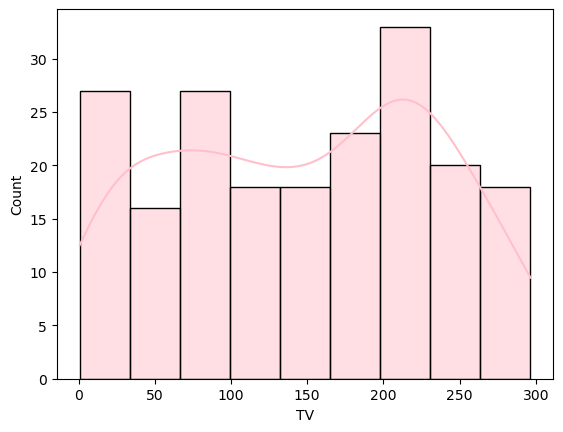

In [7]:
sns.histplot(x='TV',data=data, kde=True,color='Pink')

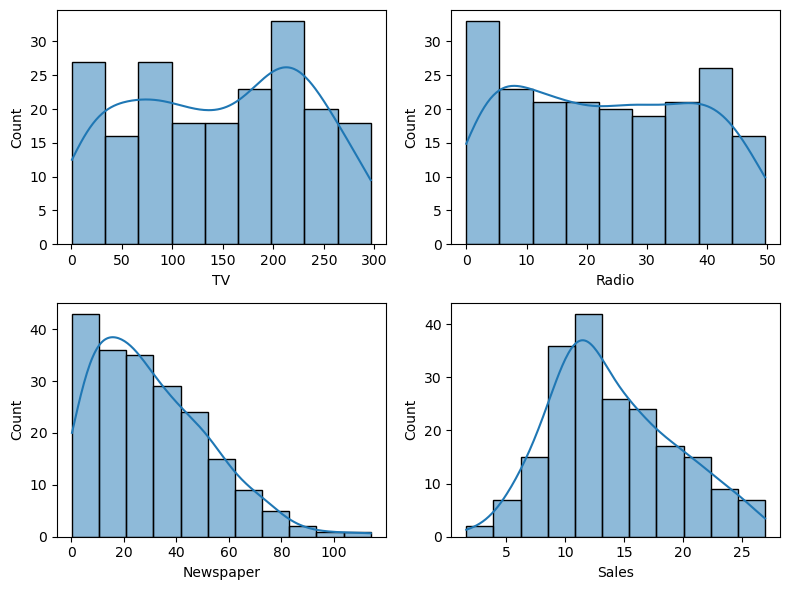

In [8]:
plt.figure(figsize=(8,6))
window=1
for i in data:
    plt.subplot(2,2,window)
    sns.histplot(x=i, data=data, kde=True)
    window+=1
plt.tight_layout()

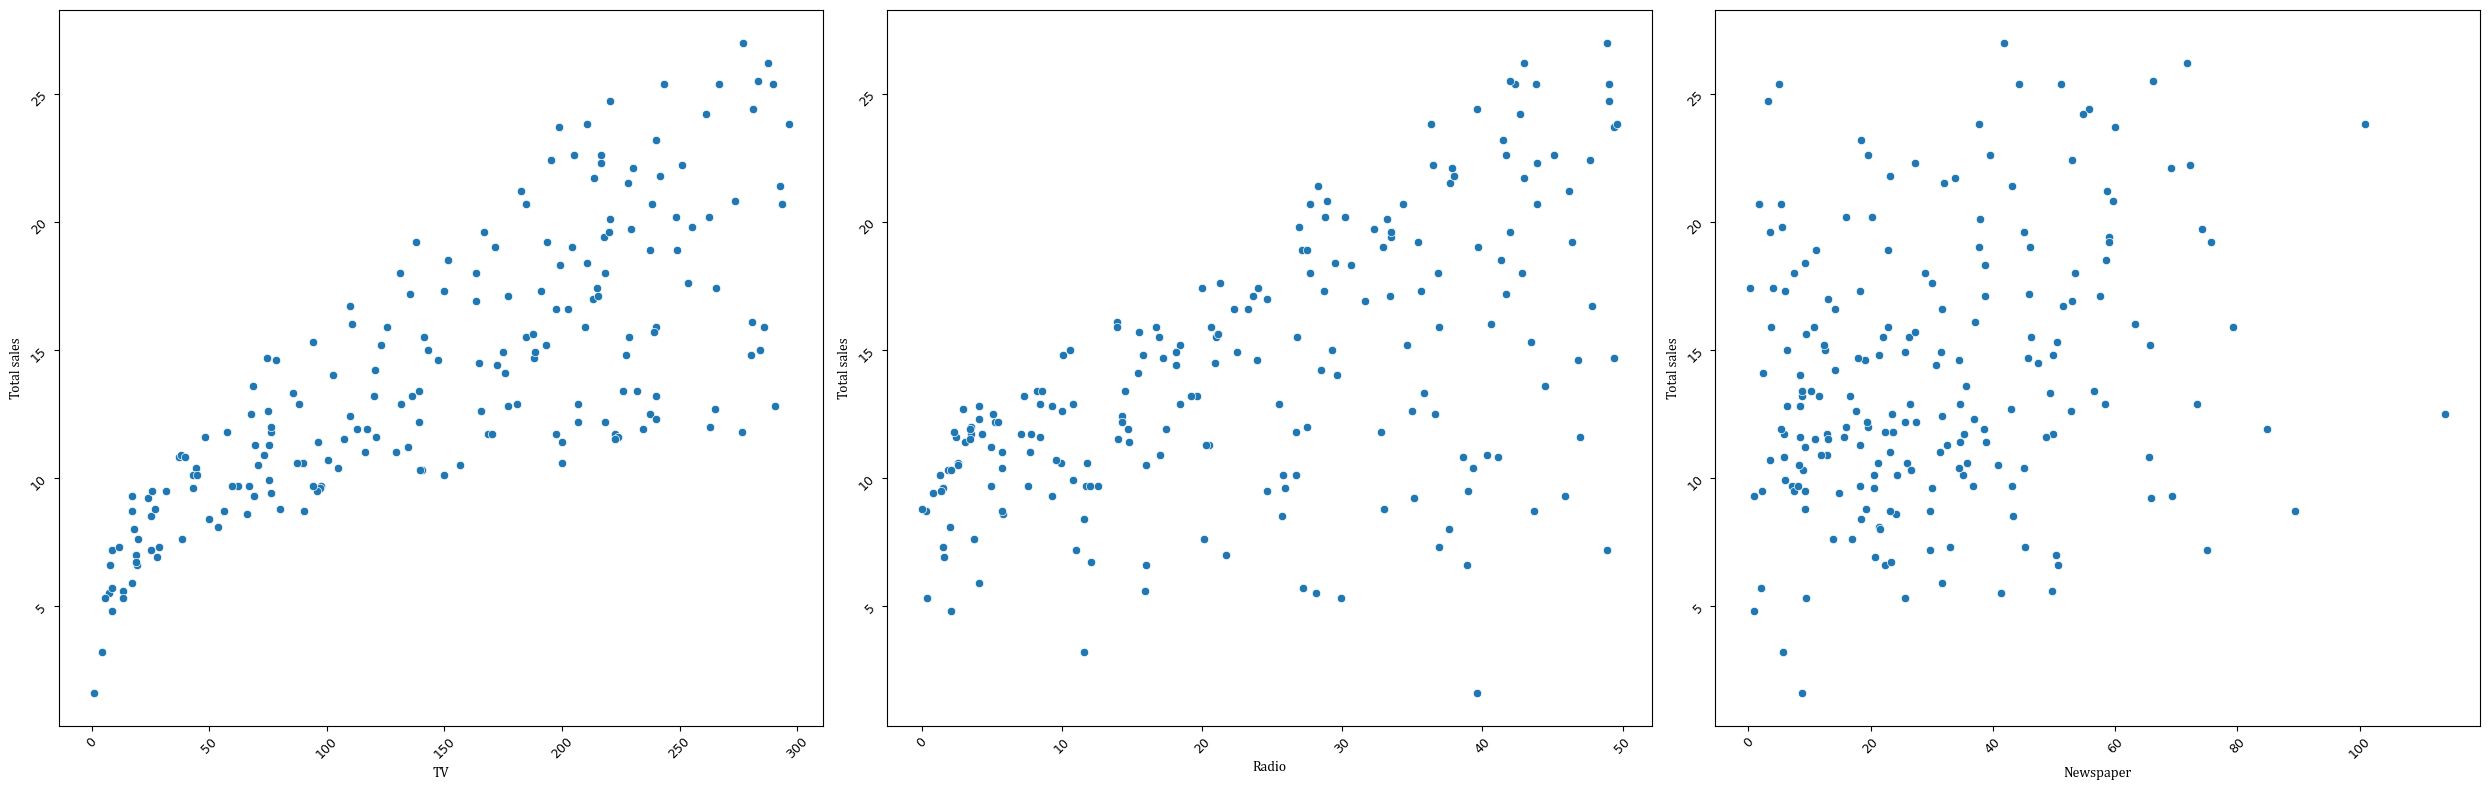

In [9]:
plt.figure(figsize=(25,8))
window=1
for i in data.drop('Sales',axis=1):
    plt.subplot(1,3,window)
    sns.scatterplot(x=i, y='Sales' ,data=data)
    plt.xticks(fontsize=9 , rotation=45)
    plt.yticks(fontsize=9, rotation=45)
    plt.xlabel(i, fontsize=10, fontfamily='Cambria')
    plt.ylabel('Total sales', fontsize=10, fontfamily='Cambria')
    window+=1
plt.tight_layout()

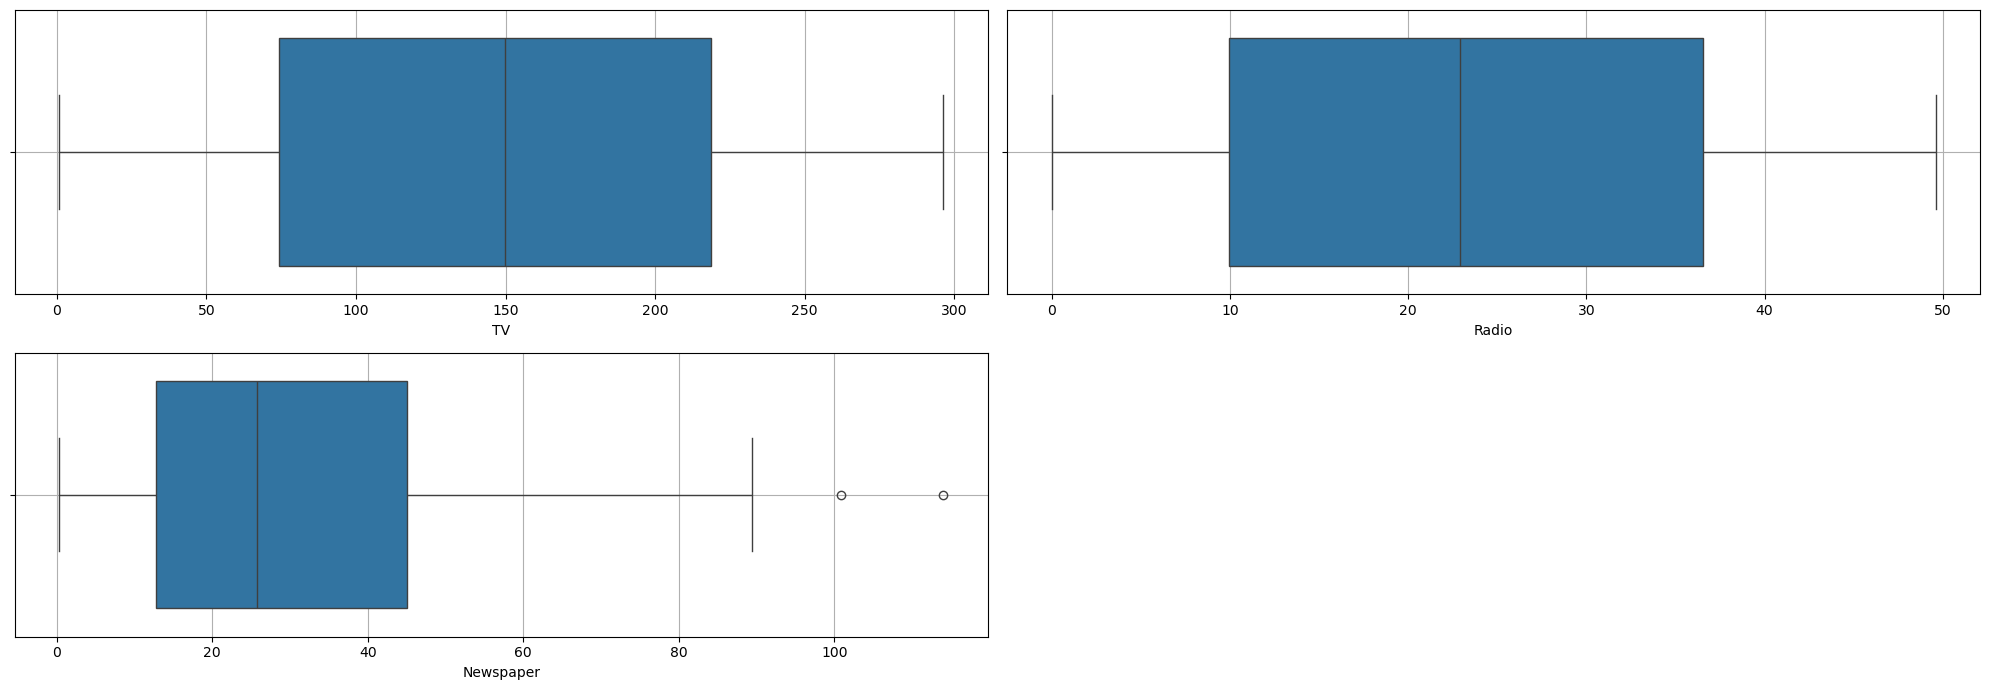

In [10]:
plt.figure(figsize=(20,7))
window=1
for i in data.drop('Sales',axis=1):
    plt.subplot(2,2,window)
    sns.boxplot(x=i ,data=data)
    plt.grid()
    #plt.xticks(fontsize=9 , rotation=45)
    #plt.yticks(fontsize=9, rotation=45)
    #plt.xlabel(i, fontsize=10, fontfamily='Cambria')
    #plt.ylabel('Total sales', fontsize=10, fontfamily='Cambria')
    window+=1
plt.tight_layout()

In [11]:
data.loc[data.Newspaper>=100, 'Newspaper']=data.Newspaper.median()

In [12]:
data.Newspaper.median()

25.675

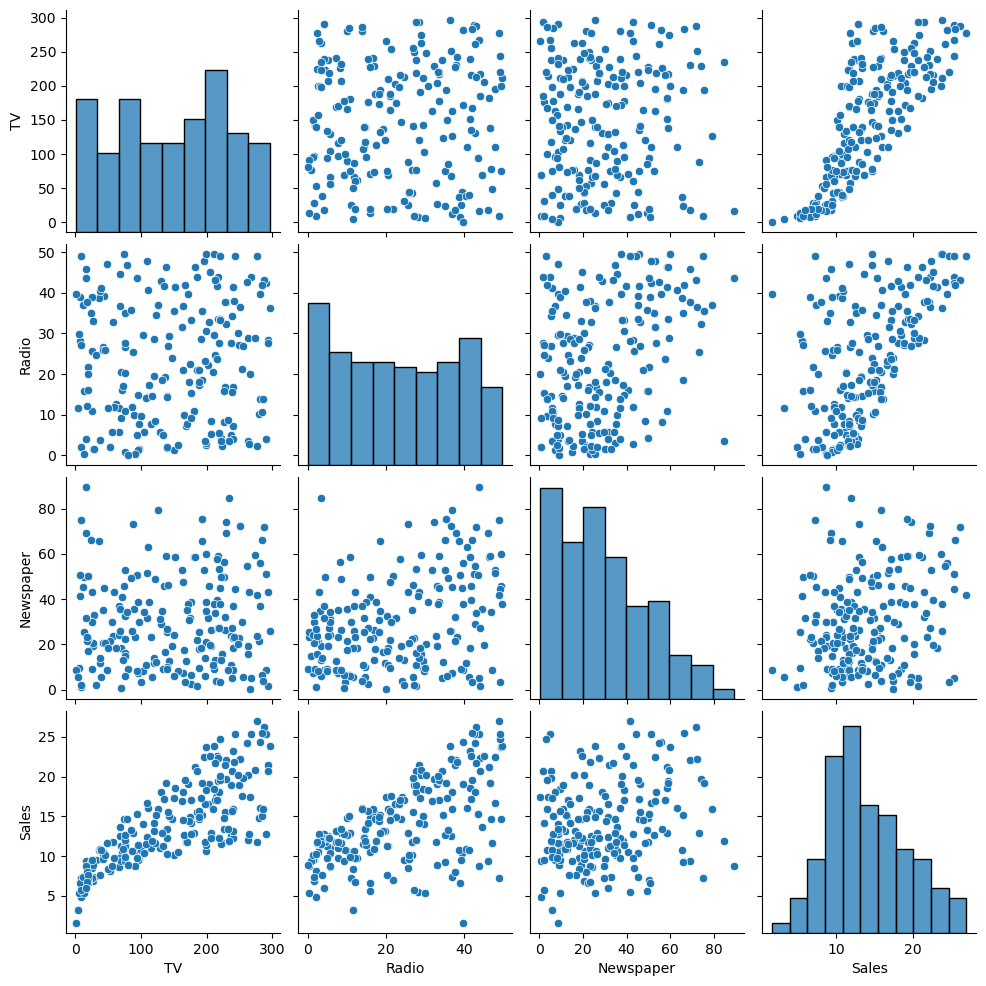

In [55]:
sns.pairplot(data)

In [14]:
cor=data.corr()
cor

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


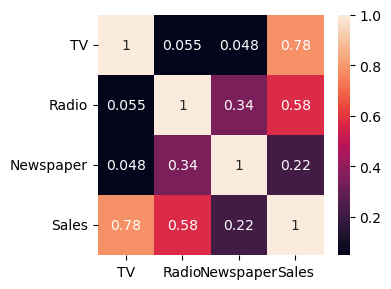

In [15]:
plt.figure(figsize=(4,3))
sns.heatmap(cor,annot=True) # cmap='RdYlBu' to give colors to the heatmap
plt.tight_layout()

In [16]:
data.mean()

TV           147.0425
Radio         23.2640
Newspaper     29.7370
Sales         14.0225
dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
data.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [19]:
scaling = MinMaxScaler()
X=pd.DataFrame(scaling.fit_transform(data.drop('Sales', axis=1)),columns=data.drop('Sales', axis=1).columns)
X

,TV,Radio,Newspaper
0,0.775786,0.762097,0.773288
1,0.148123,0.792339,0.502806
2,0.055800,0.925403,0.774411
3,0.509976,0.832661,0.653199
4,0.609063,0.217742,0.652076
...,...,...,...
195,0.126818,0.074597,0.151515
196,0.316199,0.098790,0.087542
197,0.596212,0.187500,0.068462
198,0.956713,0.846774,0.739618


In [20]:
Y=data.Sales
Y.shape

(200,)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, train_size=0.8,random_state=16) #random_state must be (0-42)
x_train.head()

,TV,Radio,Newspaper
45,0.589787,0.453629,0.350168
195,0.126818,0.074597,0.151515
178,0.933378,0.046371,0.262626
104,0.803179,0.691532,0.056117
190,0.131214,0.828629,0.061728


In [22]:
# import sklearn
# sklearn.__version__

### ModelCreation

In [23]:
from sklearn.linear_model import LinearRegression #a module which is imported from a pakage called linear_model
LinearReg_model= LinearRegression()
LinearReg_model.fit(x_train,y_train)
y_pred=LinearReg_model.predict(x_test)

In [24]:
y_pred.shape

(40,)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

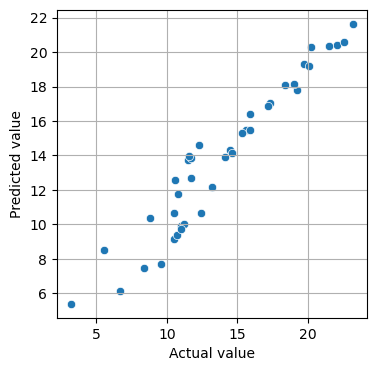

In [25]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.grid()
plt.tight_layout

In [26]:
# data

In [27]:
y_test.shape

(40,)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
mse=mean_squared_error(y_test,y_pred)
print('Mean Square Error        :',mse)
rmse=mse**0.5
print('Root Mean Square Error   :',rmse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error      :',mae)
r2=r2_score(y_test,y_pred)
print('R2_Score                 :',r2)

Mean Square Error        : 1.8848974252770803
Root Mean Square Error   : 1.3729156657555774
Mean Absolute Error      : 1.1324492808118485
R2_Score                 : 0.9184783854478343


In [30]:
adjusted_r2=1-((1-r2)*(40-1))/(40-3-1)
adjusted_r2

0.9116849175684871

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

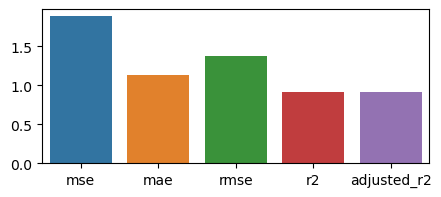

In [31]:
d= pd.DataFrame([[mse,mae,rmse,r2,adjusted_r2]],columns=['mse','mae','rmse','r2','adjusted_r2'])
plt.figure(figsize=(5,2))
sns.barplot(d)
plt.tight_layout

In [32]:
dummy=LinearRegression()
rs=[]
dummy_r2=[]
for i in range(43):
    x_train,x_test,y_train , y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    dummy.fit(x_train,y_train)
    pred=dummy.predict(x_test)
    dummy_r2.append(r2_score(y_test,pred))
    rs.append(i)

In [33]:
np.max(dummy_r2)

0.9310544768869486

In [34]:
np.argmax(dummy_r2)

13

In [35]:
# import sklearn
# sklearn.__version__

### Since random_state 13 is giving the best r2_score of 93.10% ,we will select random_state 13

In [36]:
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=13)
bestLRModel = LinearRegression()
bestLRModel.fit(x_train,y_train)
y_pred=bestLRModel.predict(x_test)

In [37]:
best_r2=r2_score(y_test,y_pred)
best_r2

0.9310544768869486

In [38]:
adj_r2=1-((1-best_r2)*(40-1))/(40-3-1)
adj_r2

0.9253090166275277

In [39]:
print(r2)
print(adjusted_r2)
print(best_r2)
print(adj_r2)

0.9184783854478343
0.9116849175684871
0.9310544768869486
0.9253090166275277


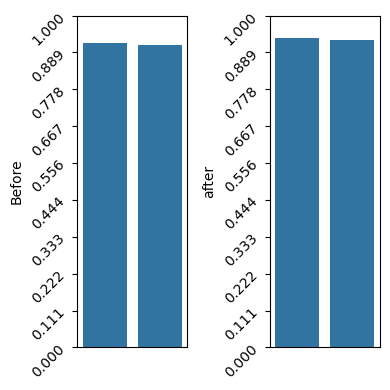

In [40]:
df=pd.DataFrame([[r2,best_r2],[adjusted_r2,adj_r2]],columns=['Before','after'])
plt.figure(figsize=(4,4))
wind=1
for i in df:
    plt.subplot(1,2,wind)
    sns.barplot(df[i])
    plt.xticks([])
    plt.yticks(np.linspace(0,1,10),rotation=45)
    
    wind+=1
plt.tight_layout()
plt.show()

In [41]:
#pip install seaborn --upgrade

In [42]:
import pickle
file=open('myfirstmodel.pkl','wb')
pickle.dump(bestLRModel,file)
file.close()

In [43]:
import pickle
with open('myfirstmodel.pkl','wb') as file:
    pickle.dump(bestLRModel,file)

In [44]:
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [45]:
ridge_model=Ridge(alpha=2)
ridge_model.fit(x_train,y_train)

Ridge(alpha=2)

In [46]:
y_hat_ridge = ridge_model.predict(x_test)

In [49]:
y_hat_lasso = lasso_model.predict(x_test)

In [48]:
lasso_model=Lasso(alpha=2)
lasso_model.fit(x_train,y_train)

Lasso(alpha=2)

In [50]:
r2=[]
for i in range(20):
    ridge_model = Ridge(alpha=1)
    ridge_model.fit(x_train,y_train)
    y_hat_ridge = ridge_model.predict(x_test)
    r2.append(r2_score(y_test,y_hat_ridge))
print('maximum r2 score:  ',np.max(r2))
print('alpha:  :',np.argmax(r2))

maximum r2 score:   0.9255406639614501
alpha:  : 0


In [51]:
r2=[]
for i in range(20):
    ridge_model = Lasso(alpha=1)
    ridge_model.fit(x_train,y_train)
    y_hat_lasso = lasso_model.predict(x_test)
    r2.append(r2_score(y_test,y_hat_lasso))

print('maximum r2 score:  ',np.max(r2))
print('alpha:  :',np.argmax(r2))

maximum r2 score:   -0.013063893533713733
alpha:  : 0
